# Семинар 7. Sklearn и линейная регрессия

## 0. Что сегодня?
- Проверочная №2
    - 10 баллов максимум
    - 15 минут 
    - составляет аудиторную оценку, каждая проверочная с равными весами
    ___
    1. Только одну из ненаписанных проверочных можно написать, если нет уважительной причины; любую можно с уважительной причиной (к примеру, поход к врачу, приносите справку)
    2. самая худшая из написанных проверочных не будет учитываться. Важнее всего, что из написанных проверочных выбирается худшая. Ненаписанные проверочные будут учитываться с нулевыми баллами, но обязательно будут учитываться каждая;
    3. в конце модуля по оценкам мы подведем итоги. Если появиться необходимость, устроим контрольную работу, чтобы вы могли поднять оценку.
- Начнем смотреть на код настоящих Data Scientists

![За работу](doit.jpg)

## 1. Sklearn Intro

- [Sklearn, машинное обучение (часть, обучение с учителем)](http://scikit-learn.org/stable/supervised_learning.html)
- [Sklearn, Линейные модели](http://scikit-learn.org/stable/modules/linear_model.html)

Что еше?
- metrics

In [1]:
import numpy as np
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot as plt

%matplotlib inline

In [85]:
boston = load_boston()
X = boston.data
y = boston.target

In [98]:
print(boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

In [95]:
import pandas as pd
boston_df = pd.DataFrame(np.column_stack([boston.data, boston.target]), columns = 
                         np.append(boston.feature_names, "MEDV_target"))

In [96]:
boston_df

CRIM    ZN  INDUS  CHAS    NOX     RM    AGE     DIS  RAD  TAX  \
0     0.00632  18.0   2.31     0  0.538  6.575   65.2  4.0900    1  296   
1     0.02731   0.0   7.07     0  0.469  6.421   78.9  4.9671    2  242   
2     0.02729   0.0   7.07     0  0.469  7.185   61.1  4.9671    2  242   
3     0.03237   0.0   2.18     0  0.458  6.998   45.8  6.0622    3  222   
4     0.06905   0.0   2.18     0  0.458  7.147   54.2  6.0622    3  222   
5     0.02985   0.0   2.18     0  0.458  6.430   58.7  6.0622    3  222   
6     0.08829  12.5   7.87     0  0.524  6.012   66.6  5.5605    5  311   
7     0.14455  12.5   7.87     0  0.524  6.172   96.1  5.9505    5  311   
8     0.21124  12.5   7.87     0  0.524  5.631  100.0  6.0821    5  311   
9     0.17004  12.5   7.87     0  0.524  6.004   85.9  6.5921    5  311   
10    0.22489  12.5   7.87     0  0.524  6.377   94.3  6.3467    5  311   
11    0.11747  12.5   7.87     0  0.524  6.009   82.9  6.2267    5  311   
12    0.09378  12.5   7.87     0  0.524  5.889   39.0  5.4509    5  311   
13    0.62976   0.0   8.14     0  0.538  5.949   61.8  4.7075    4  307   
14    0.63796   0.0   8.14     0  0.538  6.096   84.5  4.4619    4  307   
15    0.62739   0.0   8.14     0  0.538  5.834   56.5  4.4986    4  307   
16    1.05393   0.0   8.14     0  0.538  5.935   29.3  4.4986    4  307   
17    0.78420   0.0   8.14     0  0.538  5.990   81.7  4.2579    4  307   
18    0.80271   0.0   8.14     0  0.538  5.456   36.6  3.7965    4  307   
19    0.72580   0.0   8.14     0  0.538  5.727   69.5  3.7965    4  307   
20    1.25179   0.0   8.14     0  0.538  5.570   98.1  3.7979    4  307   
21    0.85204   0.0   8.14     0  0.538  5.965   89.2  4.0123    4  307   
22    1.23247   0.0   8.14     0  0.538  6.142   91.7  3.9769    4  307   
23    0.98843   0.0   8.14     0  0.538  5.813  100.0  4.0952    4  307   
24    0.75026   0.0   8.14     0  0.538  5.924   94.1  4.3996    4  307   
25    0.84054   0.0   8.14     0  0.538  5.599   85.7  4.4546    4  307   
26    0.67191   0.0   8.14     0  0.538  5.813   90.3  4.6820    4  307   
27    0.95577   0.0   8.14     0  0.538  6.047   88.8  4.4534    4  307   
28    0.77299   0.0   8.14     0  0.538  6.495   94.4  4.4547    4  307   
29    1.00245   0.0   8.14     0  0.538  6.674   87.3  4.2390    4  307   
..        ...   ...    ...   ...    ...    ...    ...     ...  ...  ...   
476   4.87141   0.0  18.10     0  0.614  6.484   93.6  2.3053   24  666   
477  15.02340   0.0  18.10     0  0.614  5.304   97.3  2.1007   24  666   
478  10.23300   0.0  18.10     0  0.614  6.185   96.7  2.1705   24  666   
479  14.33370   0.0  18.10     0  0.614  6.229   88.0  1.9512   24  666   
480   5.82401   0.0  18.10     0  0.532  6.242   64.7  3.4242   24  666   
481   5.70818   0.0  18.10     0  0.532  6.750   74.9  3.3317   24  666   
482   5.73116   0.0  18.10     0  0.532  7.061   77.0  3.4106   24  666   
483   2.81838   0.0  18.10     0  0.532  5.762   40.3  4.0983   24  666   
484   2.37857   0.0  18.10     0  0.583  5.871   41.9  3.7240   24  666   
485   3.67367   0.0  18.10     0  0.583  6.312   51.9  3.9917   24  666   
486   5.69175   0.0  18.10     0  0.583  6.114   79.8  3.5459   24  666   
487   4.83567   0.0  18.10     0  0.583  5.905   53.2  3.1523   24  666   
488   0.15086   0.0  27.74     0  0.609  5.454   92.7  1.8209    4  711   
489   0.18337   0.0  27.74     0  0.609  5.414   98.3  1.7554    4  711   
490   0.20746   0.0  27.74     0  0.609  5.093   98.0  1.8226    4  711   
491   0.10574   0.0  27.74     0  0.609  5.983   98.8  1.8681    4  711   
492   0.11132   0.0  27.74     0  0.609  5.983   83.5  2.1099    4  711   
493   0.17331   0.0   9.69     0  0.585  5.707   54.0  2.3817    6  391   
494   0.27957   0.0   9.69     0  0.585  5.926   42.6  2.3817    6  391   
495   0.17899   0.0   9.69     0  0.585  5.670   28.8  2.7986    6  391   
496   0.28960   0.0   9.69     0  0.585  5.390   72.9  2.7986    6  391   
497   0.26838   0.0   9.69     0  

### Модель **Ordinary Least Squares (OLS)** 

##### Одномерная регрессия

In [5]:
# Fitting a model is trivial: call the ``fit`` method in LinearRegression:
x = X[:, 5].reshape(-1, 1) # AVERAGE NUMBER OF ROOMS PER DWELLING
lr = LinearRegression()
lr.fit(x.reshape(-1, 1), y)
y_predicted = lr.predict(x )

/home/kvandy/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


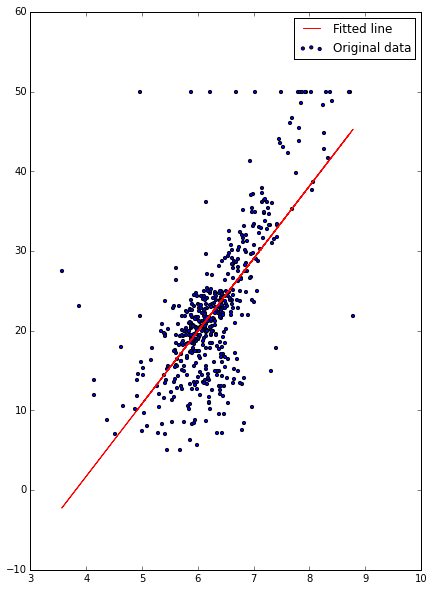

In [15]:
fig = plt.figure(figsize=(7, 10))
ax = plt.gca()
ax.scatter(x, y, label='Original data', s=10)
ax.plot(x, y_predicted, 'r', label='Fitted line')
ax.set_aspect('auto')
plt.legend()

###### Настолько легко, что можно просто использовать **numpy** 

In [102]:
# np.linal.lstsq implements least-squares linear regression
s, total_error, _, _ = np.linalg.lstsq(x, y)

rmse = np.sqrt(total_error[0] / len(x))
print('Residual: {}'.format(rmse))

Residual: 7.64268509308749


In [77]:
from sklearn.metrics import mean_squared_error
mse =  mean_squared_error(y, y_predicted)
print("MSE: {}".format(mse))
print()
# The instance member `residues_` contains the sum of the squared residues
print("Same MSE: {}".format(lr.residues_/len(x)))

MSE: 43.60055177116956

Same MSE: 43.60055177116956


$MSE = \frac1n \sum_{i=1}^n (y_i - a(x_i))^2 $

In [78]:
rmse = np.sqrt(mse)
print('RMSE: {}'.format(rmse))

RMSE: 6.603071389222561


$RMSE = \sqrt{\frac1n \sum_{i=1}^n (y_i - a(x_i))^2} \approx \sqrt{D \xi}$

** *Неравенство Чебышева* **

Если $E\xi^2 < \infty \rightarrow P(|\xi - E\xi| \geq x) \leq \frac{D\xi}{x^2}$

Можем оценить погрешность вычислений с помощью подстановки $x = c \sqrt{D\xi}$, где $с = \{2, 3, \dots\}$

### Качество алгоритма?

Сравнение:
- $с=3 \Rightarrow$ 89% (8/9 часть) всех разниц истинных значений с прогнозами не будут выходить за пределы $6.6\dot 3 = 19.8$
- сравнение с наилучшим константным прогнозом: Метод МП над $MSE$ => $a(x) = \bar{y} = \frac1n \sum_{i=1}^n y_i$ - *нулевая модель*
 По коэффициенту детерминации
$1 - \frac{\sum_i (y_i - a(x_i))^2}{(y_i - \bar{y})} \approx 1 - \frac{MSE}{VAR(y)}$

Если ...=1 - хорошая регрессионная модель, ...=0 - не лучше нулевой модкли, ...< 0 - слишком плохая регрессионная модель 

In [90]:
from sklearn.metrics import r2_score
r2 = r2_score(y, lr.predict(x))
print (" R2 (на обучающих данных): {:.2} ) " .format(r2))

 R2 (на обучающих данных): 0.48 ) 


In [92]:
r2 =lr.score(x , y)
print (" R2 (на обучающих данных): {:.2} ) " .format(r2))

 R2 (на обучающих данных): 0.48 ) 


##### Многмерная регрессия

In [23]:
x = boston.data
y = boston.target
lr.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [29]:
p = lr.predict(x)
print("R2: ", lr.score(x, y))
print("Ближе к 1, значит лучше!")

R2:  0.740607742865
Ближе к 1, значит лучше!


#### Сравнение моделей

[Fit_intercept - для чего?](http://stackoverflow.com/questions/24393518/python-sklearn-linear-model-linearregression-working-weird)

---Одномерная регрессия---
Mean squared error (of training data): 58.4
Root mean squared error (of training data): 7.64
COD (on training data): 0.31

---Многомерная регрессия---
Mean squared error (of training data): 43.6
Root mean squared error (of training data): 6.6
COD (on training data): 0.48


/home/kvandy/anaconda3/lib/python3.4/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


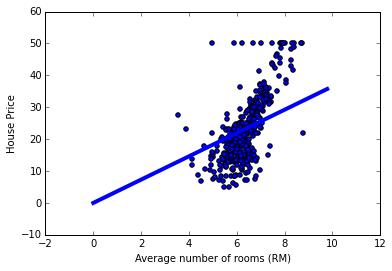

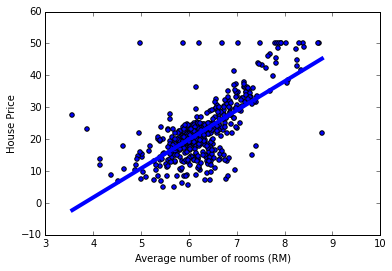

In [37]:
# Index number five in the number of rooms
fig,ax = plt.subplots()
ax.scatter(boston.data[:, 5], boston.target)
ax.set_xlabel("Average number of rooms (RM)")
ax.set_ylabel("House Price")

x = boston.data[:, 5]
# fit (used below) takes a two-dimensional array as input. We use np.atleast_2d
# to convert from one to two dimensional, then transpose to make sure that the
# format matches:
x = np.transpose(np.atleast_2d(x))

y = boston.target

lr = LinearRegression(fit_intercept=False)
lr.fit(x, y)

ax.plot([0, boston.data[:, 5].max() + 1],
         [0, lr.predict(boston.data[:, 5].max() + 1)], '-', lw=4)
fig.savefig('Figure1.png')

print("---Одномерная регрессия---")

mse = mean_squared_error(y, lr.predict(x))
print("Mean squared error (of training data): {:.3}".format(mse))

rmse = np.sqrt(mse)
print("Root mean squared error (of training data): {:.3}".format(rmse))

cod = r2_score(y, lr.predict(x))
print('COD (on training data): {:.2}'.format(cod))
print()

# Repeat, but fitting an intercept this time:
lr = LinearRegression(fit_intercept=True)

lr.fit(x, y)

fig,ax = plt.subplots()
ax.set_xlabel("Average number of rooms (RM)")
ax.set_ylabel("House Price")
ax.scatter(boston.data[:, 5], boston.target)
xmin = x.min()
xmax = x.max()
ax.plot([xmin, xmax], lr.predict([[xmin], [xmax]]) , '-', lw=4)
fig.savefig('Figure2.png')

print("---Многомерная регрессия---")

mse = mean_squared_error(y, lr.predict(x))
print("Mean squared error (of training data): {:.3}".format(mse))

rmse = np.sqrt(mse)
print("Root mean squared error (of training data): {:.3}".format(rmse))

cod = r2_score(y, lr.predict(x))
print('COD (on training data): {:.2}'.format(cod))


### Переобучение

##### Штрафы и регуляризация

Без регуляризации:
    $$w^* = \arg min_{w} ||y - Xw||^2$$
***L1 (Lasso)***:
    $$w^* = \arg min_{w} \frac1{2n} ||y - Xw||^2 + \alpha \sum_i |w_i|$$ 
***L2 (Ridge)***:
    $$w^* = \arg min_{w} ||y - Xw||^2+ \alpha \sum_i w_i^2$$
***ElasticNet (Ridge)***:
    $$w^* = \arg min_{w} \frac1{2n}||y - Xw||^2+ \alpha \rho \sum_i |w_i|+ \frac{\alpha (1 - \rho)}{2} \sum_i w_i^2$$

In [30]:
import numpy as np
from sklearn.cross_validation import KFold
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.metrics import r2_score
from sklearn.datasets import load_boston
boston = load_boston()
x = boston.data
y = boston.target

for name, met in [
        ('linear regression', LinearRegression()),
        ('lasso()', Lasso()),
        ('elastic-net(.5)', ElasticNet(alpha=0.5)),
        ('lasso(.5)', Lasso(alpha=0.5)),
        ('ridge(.5)', Ridge(alpha=0.5)),
]:
    # Fit on the whole data:
    met.fit(x, y)

    # Predict on the whole data:
    p = met.predict(x)
    r2_train = r2_score(y, p)

    # Now, we use 10 fold cross-validation to estimate generalization error
    kf = KFold(len(x), n_folds=5)
    p = np.zeros_like(y)
    for train, test in kf:
        met.fit(x[train], y[train])
        p[test] = met.predict(x[test])

    r2_cv = r2_score(y, p)
    print('Method: {}'.format(name))
    print('R2 on training: {}'.format(r2_train))
    print('R2 on 5-fold CV: {}'.format(r2_cv))
    print()
    print()

Method: linear regression
R2 on training: 0.7406077428649428
R2 on 5-fold CV: 0.559652434645513


Method: lasso()
R2 on training: 0.6825494617506651
R2 on 5-fold CV: 0.5795682066389939


Method: elastic-net(.5)
R2 on training: 0.7055782468808041
R2 on 5-fold CV: 0.6350108245667516


Method: lasso(.5)
R2 on training: 0.7139506197036718
R2 on 5-fold CV: 0.589940808802092


Method: ridge(.5)
R2 on training: 0.739919756983817
R2 on 5-fold CV: 0.5757684052376045




## Влияние гиперпараметров $\alpha, \rho$ на вектор коэффициентов линейной регрессии 

In [63]:
coefs.shape

(13, 1000)

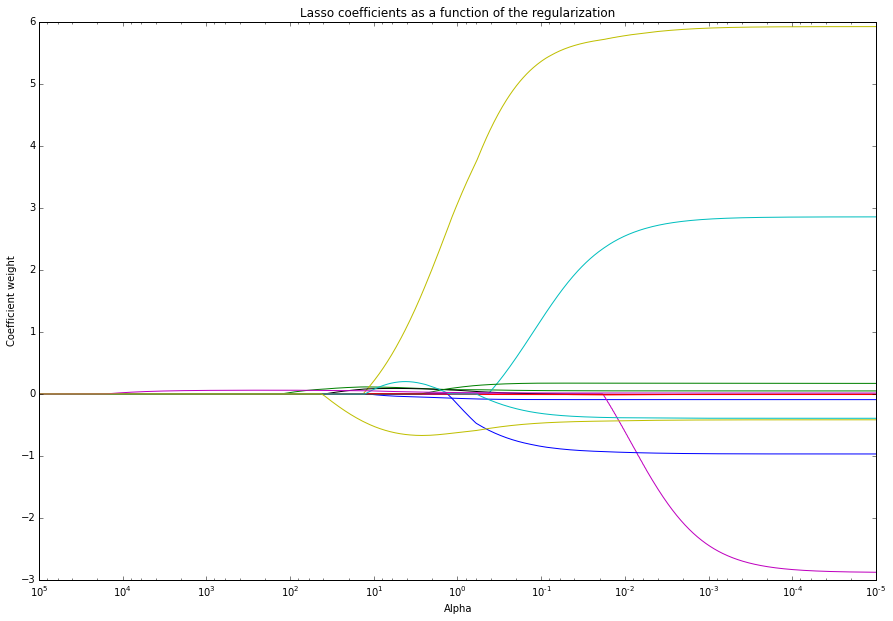

In [65]:
from matplotlib import pyplot as plt
import numpy as np

boston = load_boston()
x = boston.data
y = boston.target

las = Lasso(normalize=1)
alphas = np.logspace(-5, 5, 1000)
alphas, coefs, _= las.path(x, y, alphas=alphas)

plt.figure(figsize=(15, 10))
ax = plt.gca()
ax.plot(alphas, coefs.T)
ax.set_xscale('log')
ax.set_xlim(alphas.max(), alphas.min())
ax.set_xlabel('Lasso coefficient path as a function of alpha')
ax.set_xlabel('Alpha')
ax.set_ylabel('Coefficient weight')
ax.set_title('Lasso coefficients as a function of the regularization')
fig.savefig('Figure_LassoPath.png')


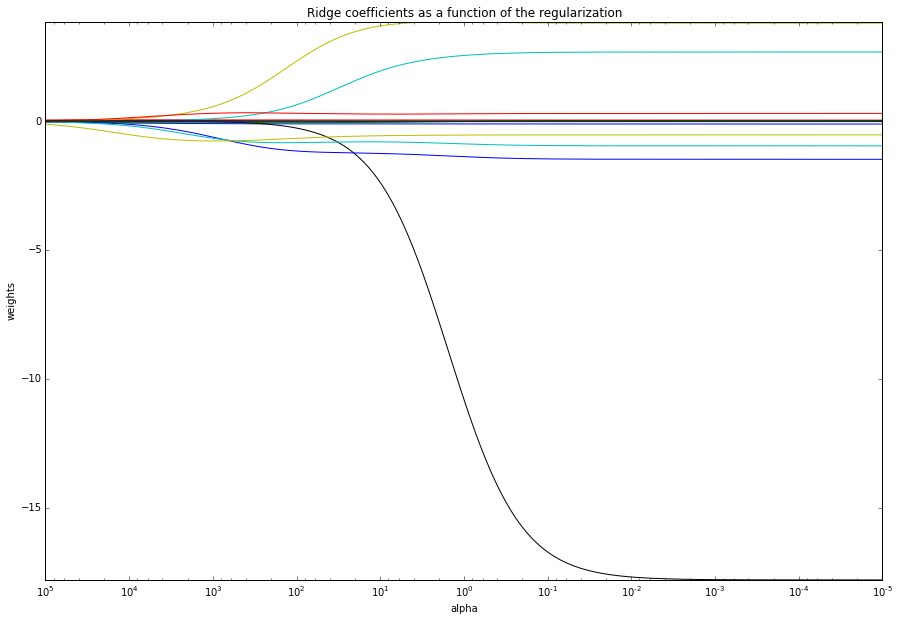

In [64]:
from sklearn import linear_model
x = boston.data
y = boston.target

n_alphas = 200
alphas = np.logspace(-5, 5, 1000)
clf = linear_model.Ridge(fit_intercept=True)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(x, y)
    coefs.append(clf.coef_)

###############################################################################
# Display results
plt.figure(figsize=(15, 10))
ax = plt.gca()
ax.set_color_cycle(['b', 'r', 'g', 'c', 'k', 'y', 'm'])

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()

In [78]:
eps=5e-4
from sklearn.linear_model import lasso_path, enet_path

def paths_figure(x, y):
    x /= x.std(axis=0)
    alphas_lasso, coefs_lasso, _ = lasso_path(x, y, eps, fit_intercept=False)
    alphas_enet, coefs_enet, _ = enet_path(
        x, y, eps=eps, l1_ratio=0.8, fit_intercept=False)


    plt.figure(figsize=(15, 10))
    ax = plt.gca()
    ax.set_color_cycle(2*['b', 'r', 'g', 'c', 'k'])
    l1 = plt.plot(-np.log10(alphas_lasso), coefs_lasso.T)
    ax.set_color_cycle(2*['b', 'r', 'g', 'c', 'k'])
    l2 = plt.plot(-np.log10(alphas_enet), coefs_enet.T, linestyle='--')

    plt.xlabel('-Log(alpha)')
    plt.ylabel('coefficients')
    plt.title('Lasso and Elastic-Net Paths')
    plt.legend((l1[-1], l2[-1]), ('Lasso', 'Elastic-Net'), loc='lower left')
    plt.axis('tight')


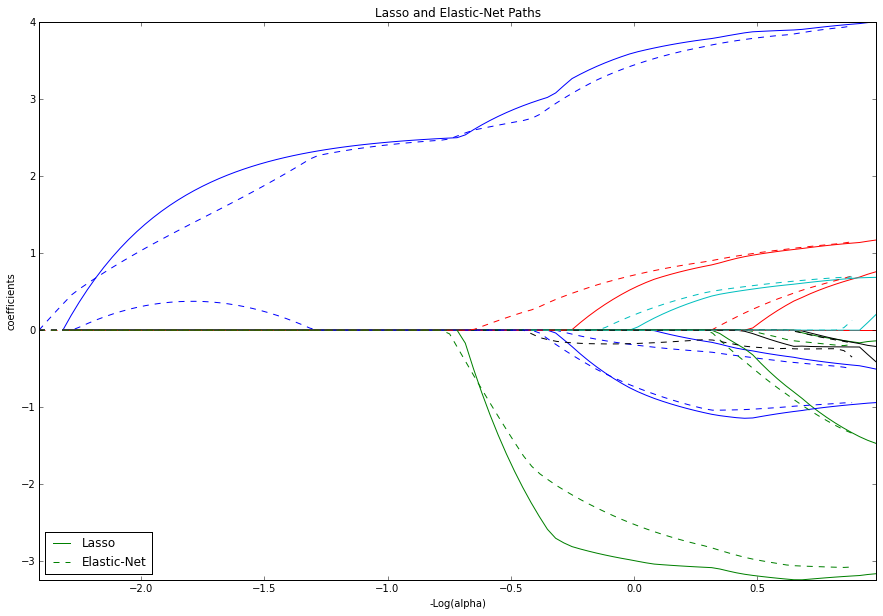

In [80]:
x = boston.data
y = boston.target
paths_figure(x, y)

### Тут покрасивее

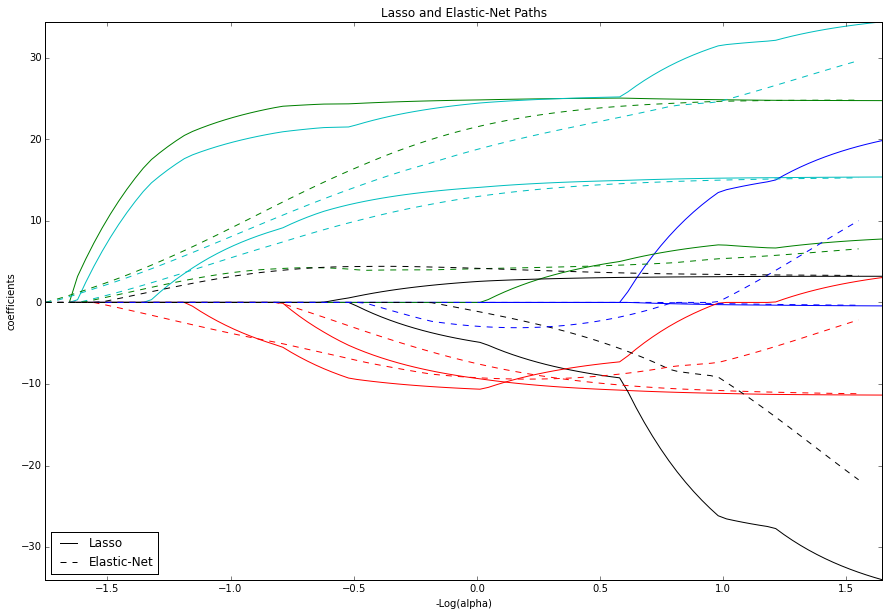

In [79]:
from sklearn import datasets

diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
paths_figure(X, y)

## Вопросы?

![caption](cat_fat.jpg)